In [1]:
import numpy as np
import dimarray as da
from matplotlib import pylab as plt
from matplotlib import ticker, cm, colors
import cmocean
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import os
import matplotlib.pyplot as pl

In [2]:
sia_e = 3.0
q =0.6
ssa_n = 3.0
GT_to_SLR=1/(1000*360)*1/12
output_proj = '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/projection_runs/4500m/'
spin_up =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/paleo_1ka_0a_'+'sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/gris_4500m.nc'
bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
input_beds = '/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'
ftt_file =input_beds+'ftt_4500m.nc'
ctrl =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/ctrl_sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/'

In [3]:
def make_levels(values,leb):
    a = np.nanmax([np.nanmax(values),-1*np.nanmin(values)])
    return(np.arange(-1*a,a,leb))
def make_levels_own(a,leb):
   
    return(np.arange(-1*a,a+1,leb))

def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
# ONLY grounded and floating ice
def diff_2d_exp_ctrl(i,vthk=500,vvel=50):
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'- ctrl ')
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
    vel0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    
    thk0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
    
def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
    
    
# ONLY grounded and floating ice
def diff_2d_exp_ctrl_thk_no(i,vthk=500,vvel=50,thk_no=5):
    '''Thickness below 5m is no ice'''
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    mth = thk1.values[0,] >thk_no
    #msk_b = msk0 + mks00 
    msk =  mth
    #msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'- ctrl ')
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')
    vel0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    
    thk0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
    return(ax)


def create_nc_monthly_variable_1d(exp,varibale,fname,dim_name):
    months = np.arange(len(exp))

    slr_po=da.DimArray(exp.tolist(),axes = [months],dims = ['months'])
    month=da.DimArray(months.tolist(),axes = [months],dims = ['months'])
#     month_co=da.DimArray(mons_cons.tolist(),axes = [mons_cons],dims = ['months'])
#     year_date=da.DimArray(years_mon.tolist(),axes = [mons_cons],dims = ['months'])
#     dim_name = my_vari_name(variable)
    dataset =da.Dataset({variable:slr_po})
    print(output_proj+fname+dim_name)
    dataset.write_nc(output_proj+fname+dim_name)
    
def diff_2d_exp_exp_files_files(files1,files2,vthk=500,vvel=50,):
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')
    vel0 = da.read_nc(output_proj+files1+'y130gris_4500.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files2+'gris_4500.nc','velsurf_mag')
    
    thk0 = da.read_nc(output_proj+files1+'gris_4500.nc','thk')
    thk1 = da.read_nc(output_proj+files2+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
    return(ax)

In [4]:
def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)

def create_monthly_variable(exp,variable = 'sea_level_rise_potential'):
    yr_end = 130

    years_mon=[]
    mons_cons=np.arange(1,12*(yr_end)+1,1)
    months = [1,2,3,4,5,6,7,8,9,10,11,12]
    mons=months*(yr_end )
    slr_pot=np.zeros(len(mons_cons))
    for i in range(1,yr_end+1):
             
        years_mon.extend([1979+(i-1)]*12)

        name = 'ts_y'+str(i)+'gris_4500.nc'
        d = da.read_nc(output_proj+exp+name,variable)
        slr_pot[(i-1)*12:12*i]=d.values
    return(slr_pot,mons_cons,np.asarray(mons),np.asarray(years_mon))
def my_vari_name(variable):
    if variable == 'sea_level_rise_potential':
        dim_name ='slr_pot'
    if variable == 'tendency_of_ice_mass_due_to_surface_mass_flux':
        dim_name='smb'
    if variable=='tendency_of_ice_mass_due_to_discharge':
        dim_name='discharge'
    if variable=='tendency_of_ice_mass':
        dim_name='ice_mass'
    if variable=='tendency_of_ice_mass_due_to_flow':
        dim_name='ice_flow'
    if variable == 'tendency_of_ice_mass_due_to_conservation_error':
        dim_name='ice_error'
    if variable == 'tendency_of_ice_mass_due_to_basal_mass_flux':
        dim_name = 'basal_ice_flux'
    if variable == 'ice_area_glacierized':
        dim_name = 'ice_area'
        
    return(dim_name)

def create_nc_monthly_variable(exp,variable = 'sea_level_rise_potential'):
    slr_pot, mons_cons, mons, years_mon = create_monthly_variable(exp,variable)

    slr_po=da.DimArray(slr_pot.tolist(),axes = [mons_cons],dims = ['months'])
    month=da.DimArray(mons.tolist(),axes = [mons_cons],dims = ['months'])
    month_co=da.DimArray(mons_cons.tolist(),axes = [mons_cons],dims = ['months'])
    year_date=da.DimArray(years_mon.tolist(),axes = [mons_cons],dims = ['months'])
    dim_name = my_vari_name(variable)
    dataset =da.Dataset({dim_name:slr_po,'consec_months':month_co,'date_month':month, 'date_year':year_date})
    save_file = '/home/beckmann/mnt/cluhome/icedata/AtmoIce/sea_ice/'
    dataset.write_nc(output_proj+exp+dim_name+'_timeline.nc')

def load_nc_monthly_variable(exp,variable= 'sea_level_rise_potential'):
    dim_name = my_vari_name(variable)
    d = da.read_nc(output_proj+exp+dim_name+'_timeline.nc')
    return(d[dim_name].values,d.months, d['date_year'].values)

def load_yearly_nc(exp,variable = 'sea_level_rise_potential'):
    name = 'ts_gris_4500m.nc'
    d = da.read_nc(output_proj+exp+name,variable)
    return d
#tendency_of_ice_mass_due_to_surface_mass_flux
#tendency_of_ice_mass_due_to_discharge
def time_for_plot_yearly(exp,variable =  'sea_level_rise_potential'):
    d =load_yearly_nc(exp,variable)
    tt=np.arange(6,6+12*len(d.time),12)
    return (d.values, tt)

def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights,'same')
    return sma
def ext_line(ax,learn_year=2012,freq=7):
    y1,y2 =ax.get_ybound()
    ext =np.arange(learn_year+6/12,2100+6/12,freq)
    for ex in ext:
        ax.plot((ex,ex),(y1,y2),'k--', alpha=0.4)
GT_to_SLR=1/(1000*360)*1/12


In [5]:
from matplotlib import ticker, cm, colors

def make_levels(values,leb):
    a = np.nanmax([np.nanmax(values),-1*np.nanmin(values)])
    return(np.arange(-1*a,a,leb))
def make_levels_own(a,leb):
   
    return(np.arange(-1*a,a+1,leb))

def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
# ONLY grounded and floating ice
def diff_2d_exp_ctrl(i,title,vthk=500,vvel=50):
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'y130gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'y130gris_4500.nc','thk')
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[1].set_title('Velocity change')
    css=ax[1].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
#     ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[0].set_title('Thickness change')
    csc=ax[0].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[1],label = '(m/a)')
    f.colorbar(csc, ax = ax[0],label = '(m)')
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    f.suptitle(title)
    return(f)
    # ax3.
def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
    vel0 = da.read_nc(output_proj+files[j]+'y130gris_4500.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'y130gris_4500.nc','velsurf_mag')
    
    thk0 = da.read_nc(output_proj+files[j]+'y130gris_4500.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'y130gris_4500.nc','thk')
    m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
#     ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    return(f,vel1.values[0,]-vel0.values[0,],thk1.values[0,]-thk0.values[0,] )
    # ax3.
    
def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
    
    
# ONLY grounded and floating ice
def diff_2d_exp_ctrl_thk_no(i,vthk=500,vvel=50,thk_no=5):
    '''Thickness below 5m is no ice'''
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    mth = thk1.values[0,] >thk_no
    #msk_b = msk0 + mks00 
    msk =  mth
    #msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change')
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
#     ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
 
    # ax3.
# def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
#     m1 = da.read_nc(ctrl+'gris_4500m.nc','mask')
#     vel0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','velsurf_mag')
#     vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    
#     thk0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','thk')
#     thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

#     f, ax = plt. subplots(1,2, figsize=(16, 8))
#     msk0 = (m1.values[0,] == 2)
#     mks00 = (m1.values[0,] ==3)

#     # mth = thk1.values[0,] >100
#     # msk = msk0 + mks00 +mth
#     msk = msk0 + mks00 

#     vel1.values[0,][~msk]=np.nan
#     vel0.values[0,][~msk]=np.nan

#     thk1.values[0,][~msk]=np.nan
#     thk0.values[0,][~msk]=np.nan
#     x=242
#     ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
#     css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
#     ax[0].plot((0,300),(x,x))
#     levels2 = make_levels_own(100,1)
#     ax[1].set_title('Thickness change')
#     csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

#     # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
#     f.colorbar(css, ax = ax[0])
#     f.colorbar(csc, ax = ax[1])
#     # ax3.
#     return(ax)

def create_nc_monthly_variable_1d(exp,varibale,fname,dim_name):
    months = np.arange(len(exp))

    slr_po=da.DimArray(exp.tolist(),axes = [months],dims = ['months'])
    month=da.DimArray(months.tolist(),axes = [months],dims = ['months'])
#     month_co=da.DimArray(mons_cons.tolist(),axes = [mons_cons],dims = ['months'])
#     year_date=da.DimArray(years_mon.tolist(),axes = [mons_cons],dims = ['months'])
#     dim_name = my_vari_name(variable)
    dataset =da.Dataset({variable:slr_po})
    print(output_proj+fname+dim_name)
    dataset.write_nc(output_proj+fname+dim_name)
    
    # def give_diff(var):
#     thk0 = da.read_nc(output_proj+files[0]+'gris_4500.nc',var)
#     thk1 = da.read_nc(output_proj+files[1]+'gris_4500.nc',var)
#     return(thk1.values[0,]-thk0.values[0,])

def give_diff(var,i):
    thk0 = da.read_nc(ctrl+'gris_4500m.nc',var)
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc',var)
    return(thk1.values[0,]-thk0.values[0,])
def give_var(var,i=1):
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc',var)
    return(thk1.values[0,])

In [6]:
import seaborn as sns
sns.set_context('paper')

## For nodyn runs

In [7]:
path_plot = './pics/'
toclu = '/home/beckmann/mnt/cluhome'

In [8]:
time_month=np.arange('1971-01', '2101-01', dtype='datetime64[M]')
time = np.arange('1971', '2101', dtype='datetime64[Y]')

In [9]:
sia_e = 3.0
q =0.6
ssa_n = 3.0
GT_to_SLR=1/(1000*360)*1/12
output_proj = '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/projection_runs/4500m/'
spin_up =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/paleo_1ka_0a_'+'sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/gris_4500m.nc'
bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
input_beds = '/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'
ftt_file =input_beds+'ftt_4500m.nc'
ctrl =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/ctrl_nlr_sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/'

In [10]:
tfile = 'slr_pot_timeline.nc'
slp = 'sea_level_rise_potential'

sec_to_year = 60*60*24*365
A_ocean_m = 362.5*10**6*10**6
rho_ice = 910.0 
rho_fw =1000
rho_sw =1028.0
dx = 4500
dy = 4500
m3_to_slr= rho_ice/(rho_fw*A_ocean_m)

In [11]:
cols =  ['blue','blue', 'green','green','orange','orange', 'red','red']

In [35]:
files_dyn0_prech=[
    'proj_T_average_monthly_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_monthly_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_20_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_20_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_10_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_10_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_5_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_5_twice10ym_lpr_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/'

]

In [36]:
files0_prech = [
    'proj_T_average_monthly_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_20_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_10_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_5_twice10ymy_nodyn_but_mass_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
   
]

In [37]:
files_dyn0=[
    'proj_T_average_monthly_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_monthly_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_20_twice10ym_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_20_twice10ym_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_10_twice10ym_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_10_twice10ym_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_5_twice10ym_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_5_twice10ym_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/'

]

In [38]:
files0 = [
    'proj_T_average_monthly_nodyn_but_mass_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_20_twice10ymy_nodyn_but_mass_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_10_twice10ymy_nodyn_but_mass_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
    'proj_T_average_July_5_twice10ymy_nodyn_but_mass_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',\
   
]

In [39]:

my_list = [
'0'\
    ,'1/20'     
    ,'1/10'    
    ,'1/5'    
]
tt = np.linspace(1,4,4)
colors= [ 'blue', 'green','orange','red']

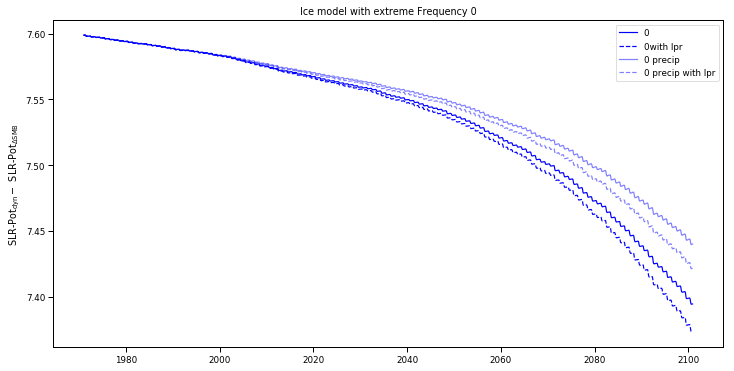

In [40]:
f=plt.subplots(1,1, figsize = (12,6))
i =0
plt.title('Ice model with extreme Frequency '+my_list[i])
d_m =  da.read_nc(output_proj + files_dyn0[::2][i]+'slr_pot_timeline.nc','slr_pot')
# plt.plot(time_month,d_m.values)#,Dlabel =my_list[i], color =colors[i])
plt.plot(time_month,d_m.values,label =my_list[i], color =colors[i])

d_m =  da.read_nc(output_proj + files_dyn0[1::2][i]+'slr_pot_timeline.nc','slr_pot')
plt.plot(time_month,d_m.values,label =my_list[i] + 'with lpr', color =colors[i],linestyle = '--')

d_m =  da.read_nc(output_proj + files_dyn0_prech[::2][i]+'slr_pot_timeline.nc','slr_pot')
plt.plot(time_month,d_m.values,label =my_list[i]+ ' precip', color =colors[i], alpha = 0.5)

d_m =  da.read_nc(output_proj + files_dyn0_prech[1::2][i]+'slr_pot_timeline.nc','slr_pot')
plt.plot(time_month,d_m.values,label =my_list[i] + ' precip with lpr', color =colors[i],alpha = 0.5,linestyle = '--')

plt.ylabel('SLR-$\mathrm{Pot_{dyn}-}$ SLR-$\mathrm{Pot_{\Delta SMB}}$')
plt.legend()

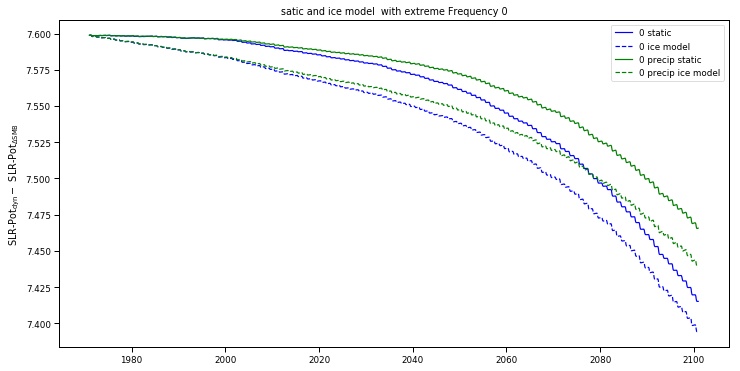

In [42]:
f=plt.subplots(1,1, figsize = (12,6))
i =0
plt.title('satic and ice model  with extreme Frequency '+my_list[i])
d_m =  da.read_nc(output_proj + files0[i]+'ts_calc_slr_pot_no_neg_mass.nc','sea_level_rise_potential')
plt.plot(time_month,d_m.values,label =my_list[i] +' static', color =colors[i])

d_m =  da.read_nc(output_proj + files_dyn0[0::2][i]+'slr_pot_timeline.nc','slr_pot')
plt.plot(time_month,d_m.values,label =my_list[i] + ' ice model', color =colors[i],linestyle = '--')

d_m =  da.read_nc(output_proj + files0_prech[i]+'ts_calc_slr_pot_no_neg_mass.nc','sea_level_rise_potential')
plt.plot(time_month,d_m.values,label =my_list[i]+ ' precip static', color =colors[i+1])

d_m =  da.read_nc(output_proj + files_dyn0_prech[0::2][i]+'slr_pot_timeline.nc','slr_pot')
plt.plot(time_month,d_m.values,label =my_list[i] + ' precip ice model', color =colors[i+1],linestyle = '--')

plt.ylabel('SLR-$\mathrm{Pot_{dyn}-}$ SLR-$\mathrm{Pot_{\Delta SMB}}$')
plt.legend()

## static versus dynamic

In [43]:
# # files0 =np.zeros(4)
# # dyn_effekt = np.zeros(len(files0))
# # dyn_effekt_rel = np.zeros(len(files0))
# # dyn_effekt_long = np.zeros((len(files0),len(time_month)))
# my_list = [
# '0'\
#     ,'1/20'     
#     ,'1/10'    
#     ,'1/5'    
# ]
# tt = np.linspace(1,4,4)


In [44]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', alpha = 0.5,linestyle ='-.'),
                Line2D([0], [0], color='k', linestyle = '--'),
                Line2D([0], [0], color='k' )]


In [45]:
nn =np.load('./datasets/dyn_attr_withprecip.npz')
dyn_effekt_prech=nn['dyn_effekt']
dyn_effekt_nlpr_prech=nn['dyn_effekt_nlpr']
dyn_effekt_rel_prech=nn['dyn_effekt_rel']
dyn_effekt_rel_nlpr_prech=nn['dyn_effekt_rel_nlpr']
dyn_effekt_long_prech=nn['dyn_effekt_long']
dyn_effekt_long_nlr_prech=nn['dyn_effekt_long_nlr']

In [46]:
nn =np.load('./datasets/dyn_attr_noprecip.npz')
dyn_effekt=nn['dyn_effekt']
dyn_effekt_nlpr=nn['dyn_effekt_nlpr']
dyn_effekt_rel=nn['dyn_effekt_rel']
dyn_effekt_rel_nlpr=nn['dyn_effekt_rel_nlpr']
dyn_effekt_long=nn['dyn_effekt_long']
dyn_effekt_long_nlr=nn['dyn_effekt_long_nlr']

In [29]:
dyn_effekt_rel

array([0.18464115, 0.17877305, 0.17508589, 0.16580805])

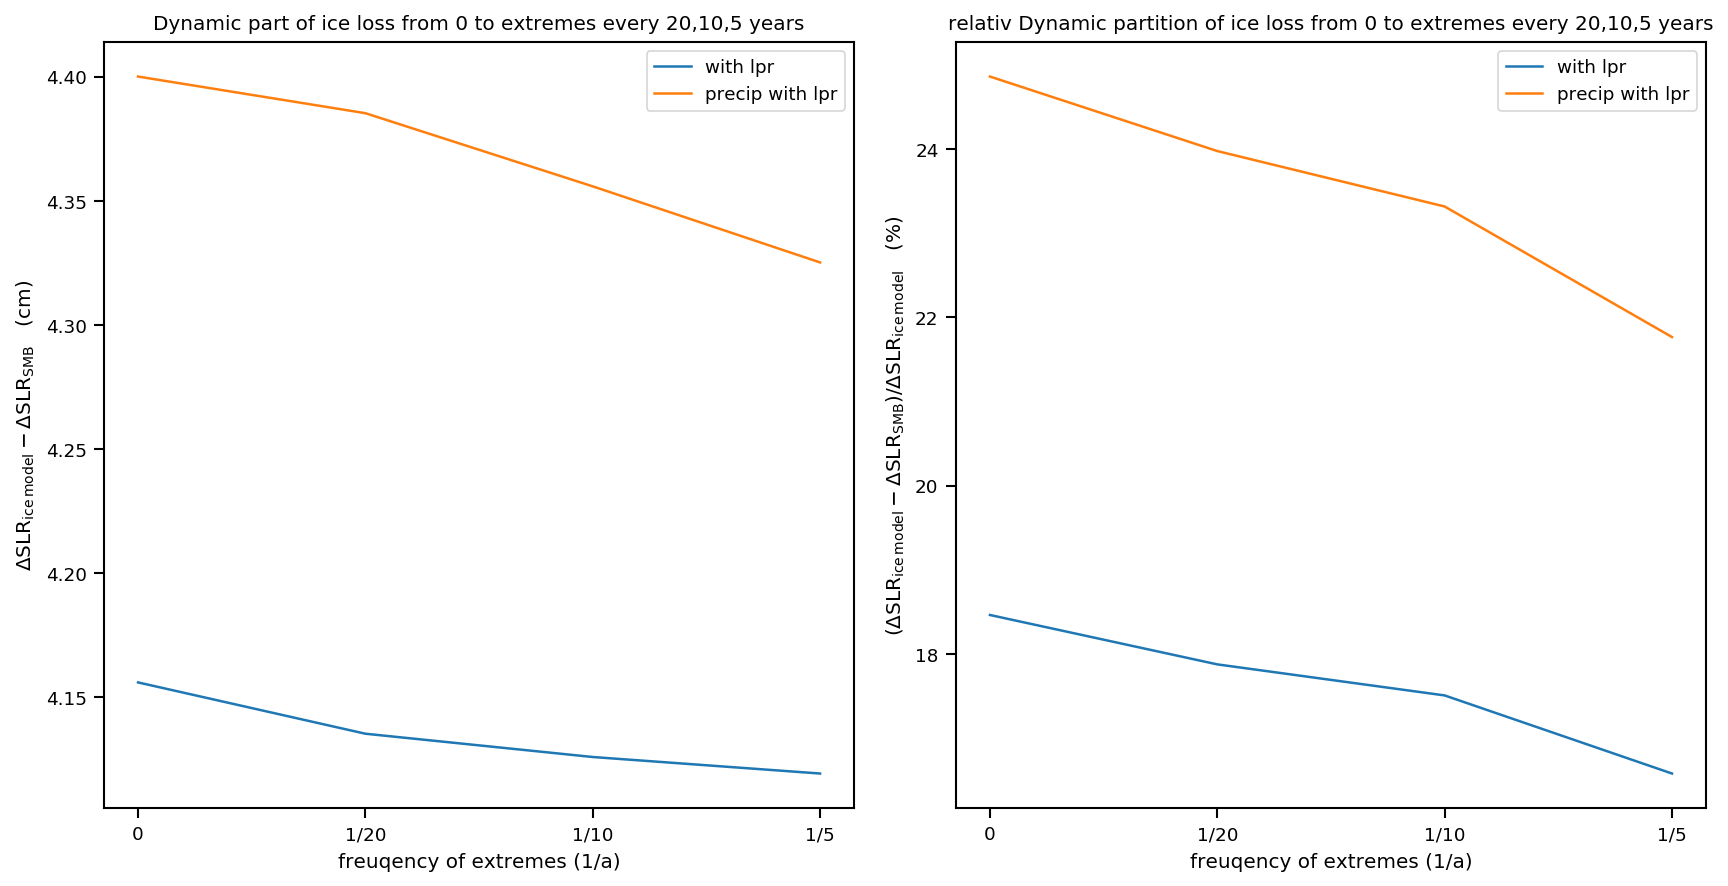

In [47]:
f,(ax,ax2) = plt.subplots(1,2,figsize= (12,6),dpi=150 ) 
ax.set_title( 'Dynamic part of ice loss from 0 to extremes every 20,10,5 years')
ax2.set_title( 'relativ Dynamic partition of ice loss from 0 to extremes every 20,10,5 years')
ax.plot(tt,dyn_effekt*100, label = 'with lpr')
ax.plot(tt,dyn_effekt_prech*100, label = 'precip with lpr')
# ax.plot(tt,dyn_effekt_nlpr*100,label = 'no lpr')
ax.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax.set_xticklabels(labels,rotation = 0)
ax.set_ylabel('$\mathrm{\Delta SLR_{ice \, model} - \Delta SLR_{SMB}\quad (cm) } $' )
ax.set_xlabel('freuqency of extremes (1/a)')
# labels = [item.get_text() for item in ax.get_xticklabels()]


ax2.plot(tt,dyn_effekt_rel*100,label = 'with lpr')
ax2.plot(tt,dyn_effekt_rel_prech*100,label = 'precip with lpr')
# ax2.plot(tt,dyn_effekt_rel_nlpr*100,label ='no lpr')
ax2.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax2.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax2.set_xticklabels(labels,rotation = 0)
ax2.set_ylabel('$\mathrm{(\Delta SLR_{ice \, model} - \Delta SLR_{SMB})/\Delta SLR_{ice \, model} \quad (\%) } $' )
ax2.set_xlabel('freuqency of extremes (1/a)')

f.tight_layout()
plt.savefig(path_plot + 'prech_dyn_attr_lpr.pdf')
plt.savefig(path_plot + 'prech_dyn_attr_lpr.png', transparent=True)
ax.legend()
ax2.legend()

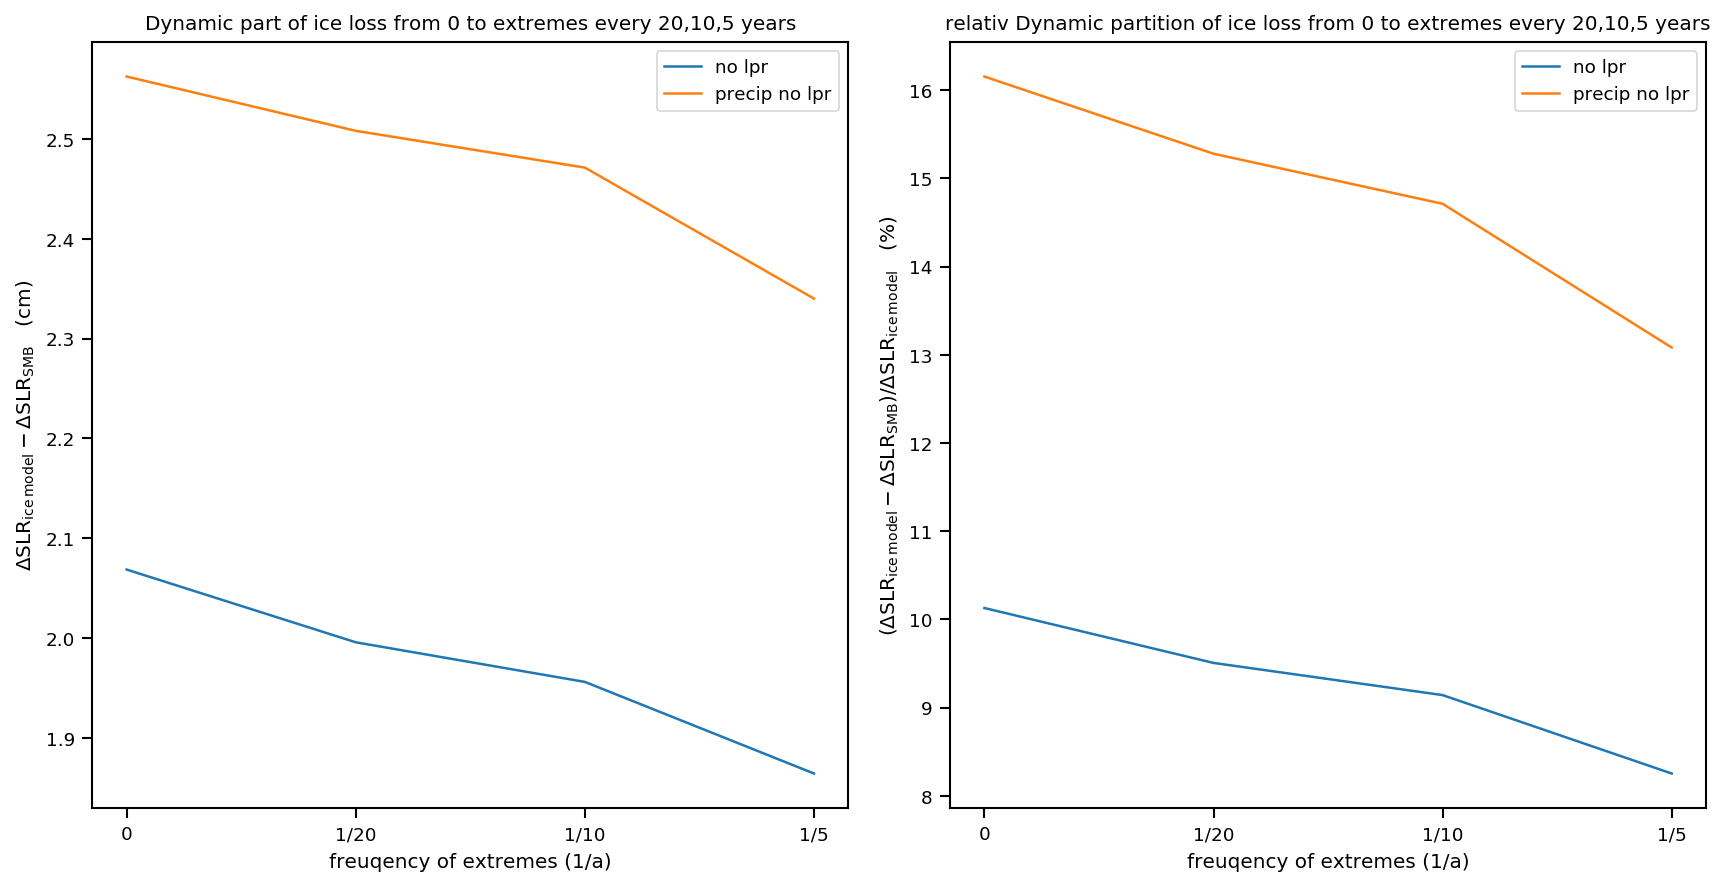

In [48]:
f,(ax,ax2) = plt.subplots(1,2,figsize= (12,6),dpi=150 ) 
ax.set_title( 'Dynamic part of ice loss from 0 to extremes every 20,10,5 years')
ax2.set_title( 'relativ Dynamic partition of ice loss from 0 to extremes every 20,10,5 years')
ax.plot(tt,dyn_effekt_nlpr*100, label = 'no lpr')
ax.plot(tt,dyn_effekt_nlpr_prech*100, label = 'precip no lpr')
# ax.plot(tt,dyn_effekt_nlpr*100,label = 'no lpr')
ax.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax.set_xticklabels(labels,rotation = 0)
ax.set_ylabel('$\mathrm{\Delta SLR_{ice \, model} - \Delta SLR_{SMB}\quad (cm) } $' )
ax.set_xlabel('freuqency of extremes (1/a)')
# labels = [item.get_text() for item in ax.get_xticklabels()]


ax2.plot(tt,dyn_effekt_rel_nlpr*100,label = 'no lpr')
ax2.plot(tt,dyn_effekt_rel_nlpr_prech*100,label = 'precip no lpr')

# ax2.plot(tt,dyn_effekt_rel_nlpr*100,label ='no lpr')
ax2.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax2.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax2.set_xticklabels(labels,rotation = 0)
ax2.set_ylabel('$\mathrm{(\Delta SLR_{ice \, model} - \Delta SLR_{SMB})/\Delta SLR_{ice \, model} \quad (\%) } $' )
ax2.set_xlabel('freuqency of extremes (1/a)')

f.tight_layout()
plt.savefig(path_plot + 'prech_dyn_attr_lpr.pdf')
plt.savefig(path_plot + 'prech_dyn_attr_lpr.png', transparent=True)
ax.legend()
ax2.legend()

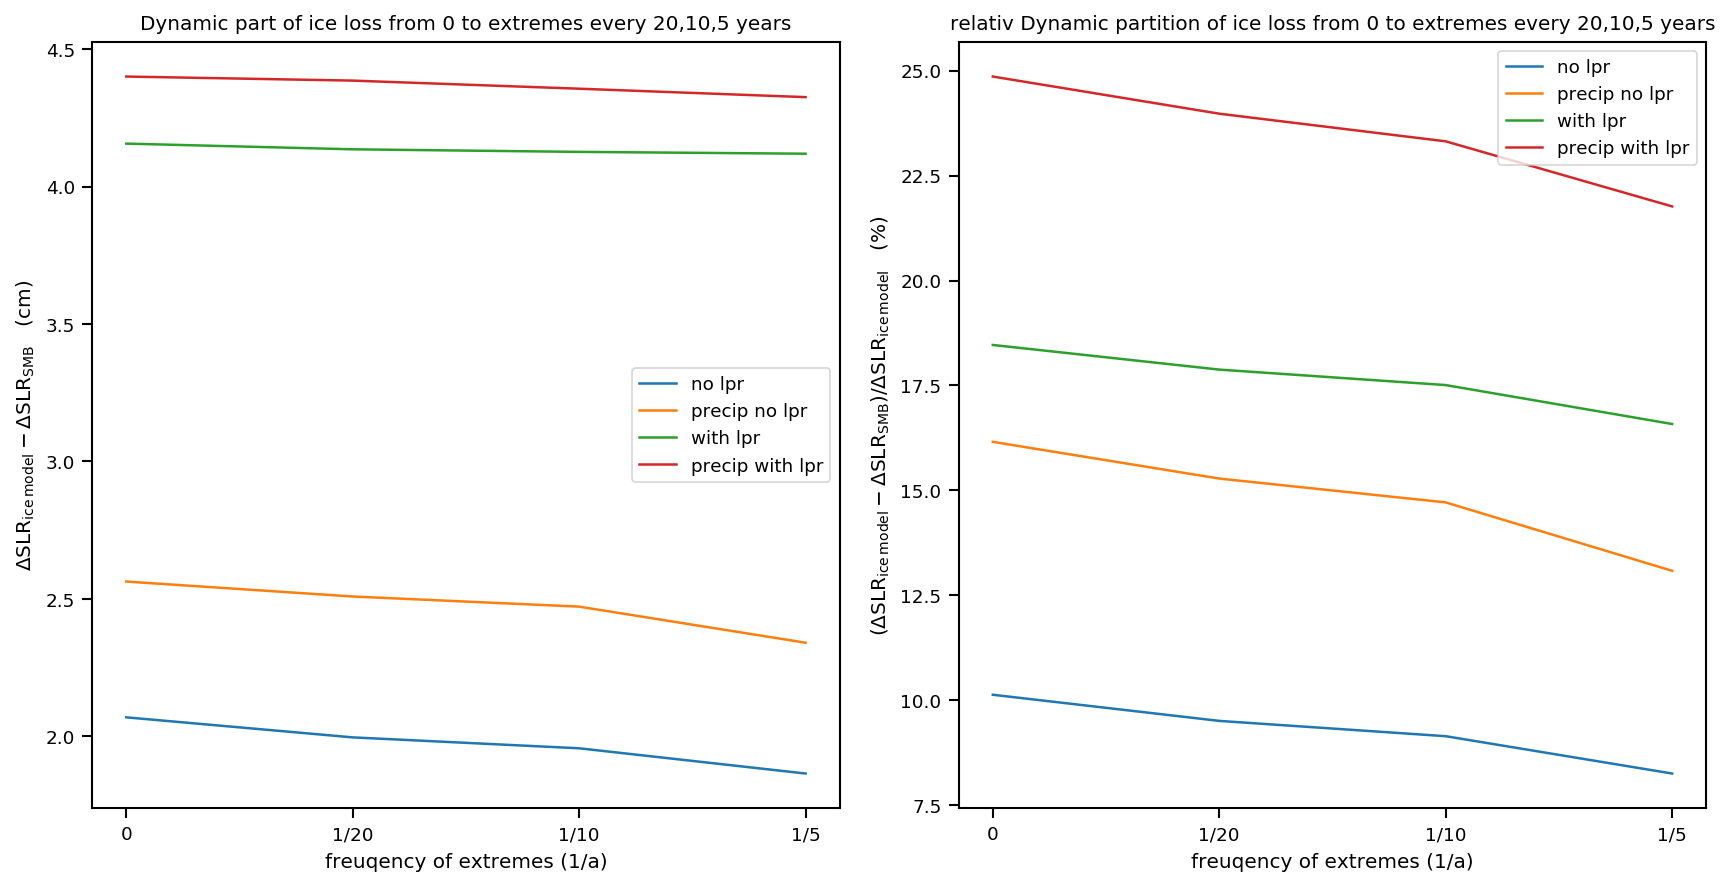

In [49]:
f,(ax,ax2) = plt.subplots(1,2,figsize= (12,6),dpi=150 ) 
ax.set_title( 'Dynamic part of ice loss from 0 to extremes every 20,10,5 years')
ax2.set_title( 'relativ Dynamic partition of ice loss from 0 to extremes every 20,10,5 years')
ax.plot(tt,dyn_effekt_nlpr*100, label = 'no lpr')
ax.plot(tt,dyn_effekt_nlpr_prech*100, label = 'precip no lpr')
ax.plot(tt,dyn_effekt*100, label = 'with lpr')
ax.plot(tt,dyn_effekt_prech*100, label = 'precip with lpr')
# ax.plot(tt,dyn_effekt_nlpr*100,label = 'no lpr')
ax.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax.set_xticklabels(labels,rotation = 0)
ax.set_ylabel('$\mathrm{\Delta SLR_{ice \, model} - \Delta SLR_{SMB}\quad (cm) } $' )
ax.set_xlabel('freuqency of extremes (1/a)')
# labels = [item.get_text() for item in ax.get_xticklabels()]


ax2.plot(tt,dyn_effekt_rel_nlpr*100,label = 'no lpr')
ax2.plot(tt,dyn_effekt_rel_nlpr_prech*100,label = 'precip no lpr')

ax2.plot(tt,dyn_effekt_rel*100,label = 'with lpr')
ax2.plot(tt,dyn_effekt_rel_prech*100,label = 'precip with lpr')
# ax2.plot(tt,dyn_effekt_rel_nlpr*100,label ='no lpr')
ax2.set_xticks(tt)
# ax.xaxis.set_minor_formatter(plt.NullFormatter())
labels = ax2.get_xticks().tolist()
labels = my_list
# labels[0::2]= ['','','','','']
# # labels[0] = files_name[0]
ax2.set_xticklabels(labels,rotation = 0)
ax2.set_ylabel('$\mathrm{(\Delta SLR_{ice \, model} - \Delta SLR_{SMB})/\Delta SLR_{ice \, model} \quad (\%) } $' )
ax2.set_xlabel('freuqency of extremes (1/a)')

f.tight_layout()
plt.savefig(path_plot + 'prech_dyn_attr_lpr.pdf')
plt.savefig(path_plot + 'prech_dyn_attr_lpr.png', transparent=True)
ax.legend()
ax2.legend()

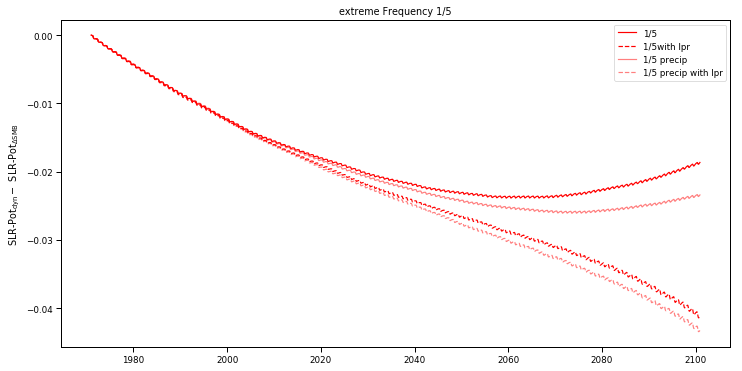

In [60]:
f=plt.subplots(1,1, figsize = (12,6))
i =3
plt.title('extreme Frequency '+my_list[i])
plt.plot(time_month,dyn_effekt_long_nlr[i,],label =my_list[i], color =colors[i])
plt.plot(time_month,dyn_effekt_long[i,],label =my_list[i] + 'with lpr', color =colors[i],linestyle = '--')
plt.plot(time_month,dyn_effekt_long_nlr_prech[i,],label =my_list[i]+ ' precip', color =colors[i], alpha = 0.5)
plt.plot(time_month,dyn_effekt_long_prech[i,],label =my_list[i] + ' precip with lpr', color =colors[i],alpha = 0.5,linestyle = '--')

plt.ylabel('SLR-$\mathrm{Pot_{dyn}-}$ SLR-$\mathrm{Pot_{\Delta SMB}}$')
plt.legend()

In [48]:
dyn_effekt_long_nlr[0,]

array([ 6.37590236e-06, -1.59241511e-05, -3.01700306e-05, ...,
       -2.08282867e-02, -2.07484412e-02, -2.06788992e-02])

# 2D diffs

In [83]:
files_dyn0

['proj_T_average_monthly_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_monthly_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_20_twice10ym_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_10_twice10ym_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_dev_5.0_const_ref_0.25_temp_dT_par_275.15/',
 'proj_T_average_July_5_twice10ym_lpr_dev_5.0_const_ref_0.25_temp_dT_par_275.15/']

In [84]:
files0

array([0., 0., 0., 0.])

### ice model compare with and 

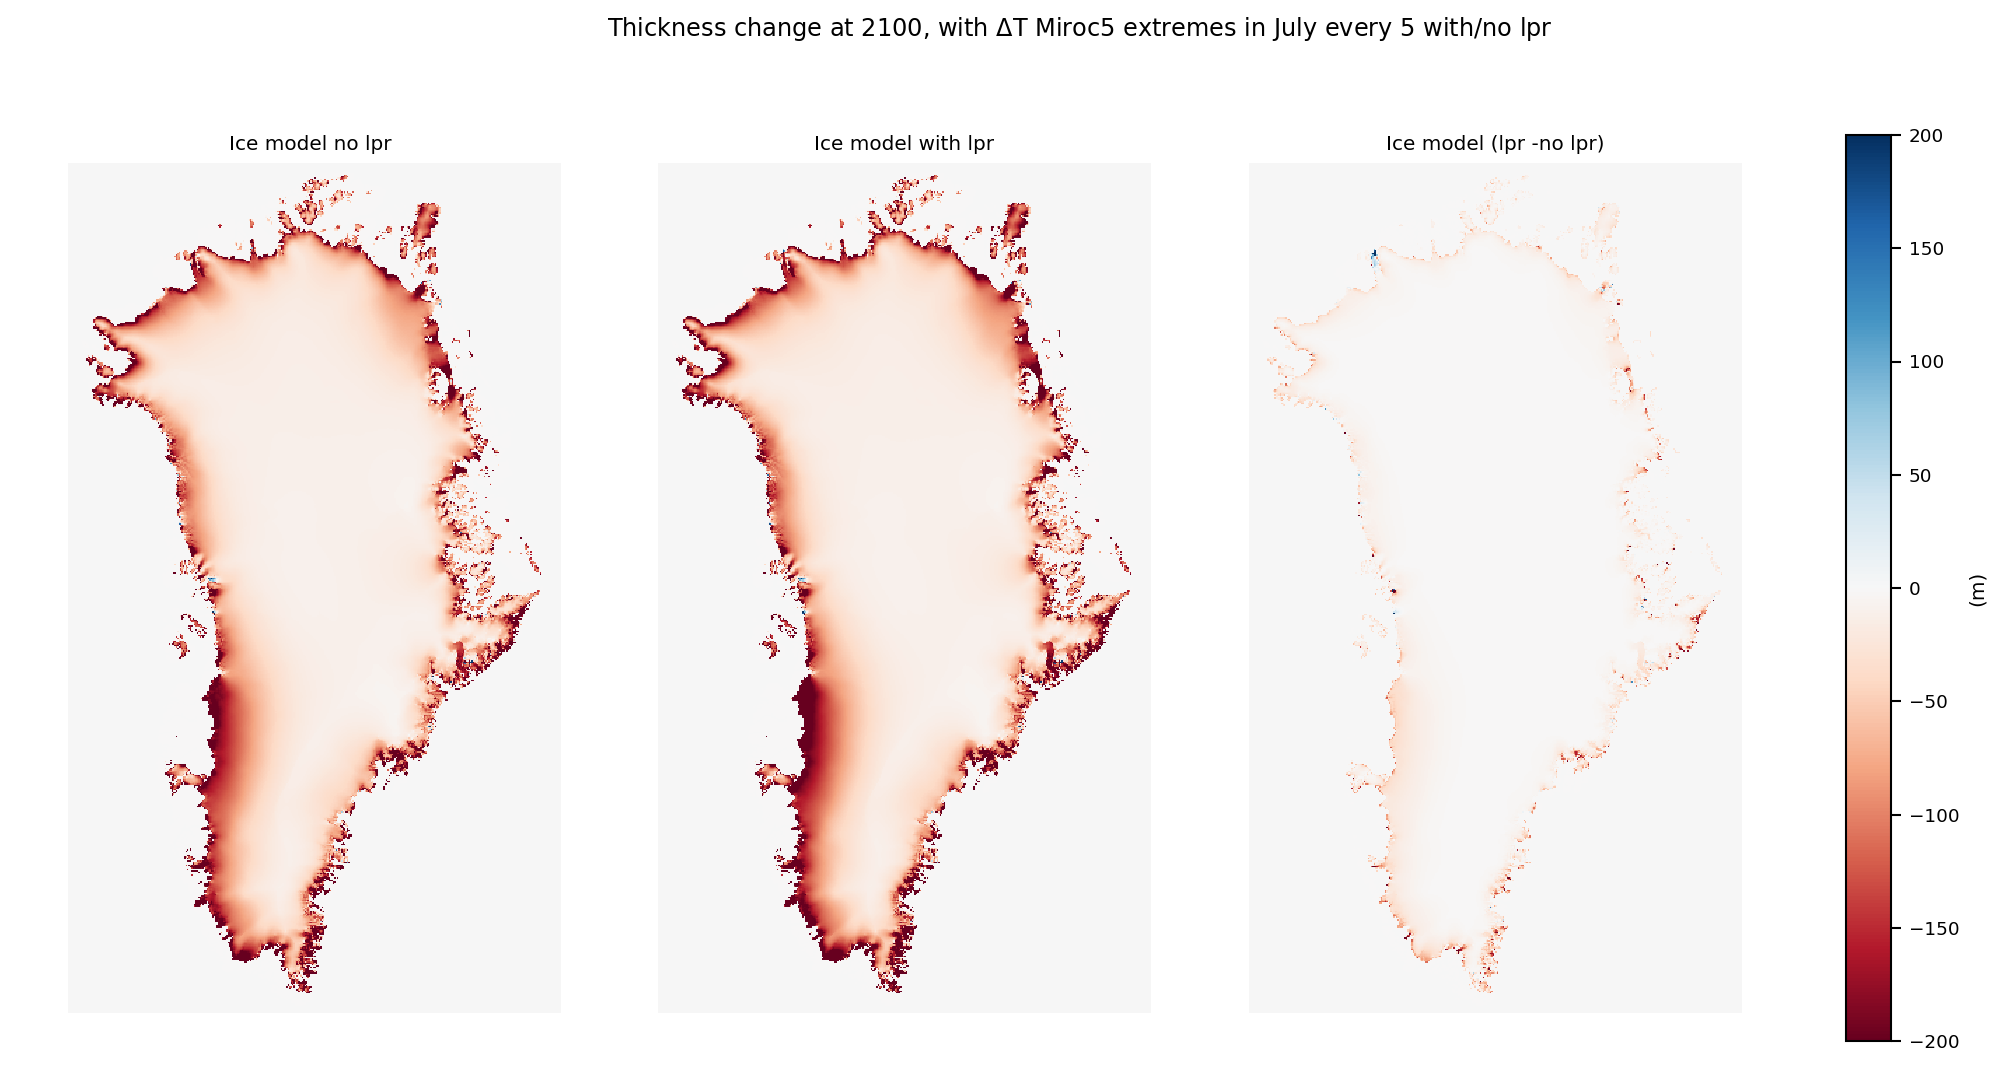

In [51]:
### extremes

file_lpr = files_dyn0[7]
file= files_dyn0[6]
file_no_mass= files0[3]
thk0 = da.read_nc(output_proj + 'proj_step6K_330a_no_mass/'+'gris_4500.nc','thk')

thk1 = da.read_nc(output_proj+file+'y130gris_4500.nc','thk')
thk1_lpr = da.read_nc(output_proj+file_lpr+'y130gris_4500.nc','thk')
nn = np.load(output_proj + file_no_mass + 'calc_thickness_grounded_from_total_thickness.npz')
dthk1=nn['thk_last']
dthk0= nn['thk_0']
dthk1_extr = dthk1
thk1_extr = thk1



vvel = 200
f,ax =plt.subplots(1,3,figsize =(18,8),dpi=150)
f.suptitle('Thickness change at 2100, with $ \mathrm{\Delta T} $ Miroc5 extremes in July every 5 with/no lpr')

ax[0].set_title('Ice model no lpr ')
ax[1].set_title('Ice model with lpr')
ax[2].set_title('Ice model (lpr -no lpr)')
css=ax[0].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# # plt.axis('off')

ax[0].set_axis_off()
css=ax[1].imshow( thk1_lpr.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)

# cs1=ax[1].imshow( dthk1-dthk0 ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# plt.axis('off')
ax[1].set_axis_off()

cs2=ax[2].imshow( thk1_lpr.values[0,]- thk1.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
ax[2].set_axis_off()
# f.colorbar(css, ax = ax[0])
# f.colorbar(cs1, ax = ax[1])
f.colorbar(cs2,ax=ax.ravel().tolist(), label ='(m)')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lpr.pdf')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lp.png', transparent=True)
# plt.axis('off')

In [53]:
files_dyn0_prech[6]

'proj_T_average_July_5_twice10ym_prech_dev_5.0_const_ref_0.25_temp_dT_par_275.15/'

In [55]:
files0[3]

'proj_T_average_July_5_twice10ymy_nodyn_but_mass_dev_5.0_const_ref_0.25_temp_dT_par_275.15/'

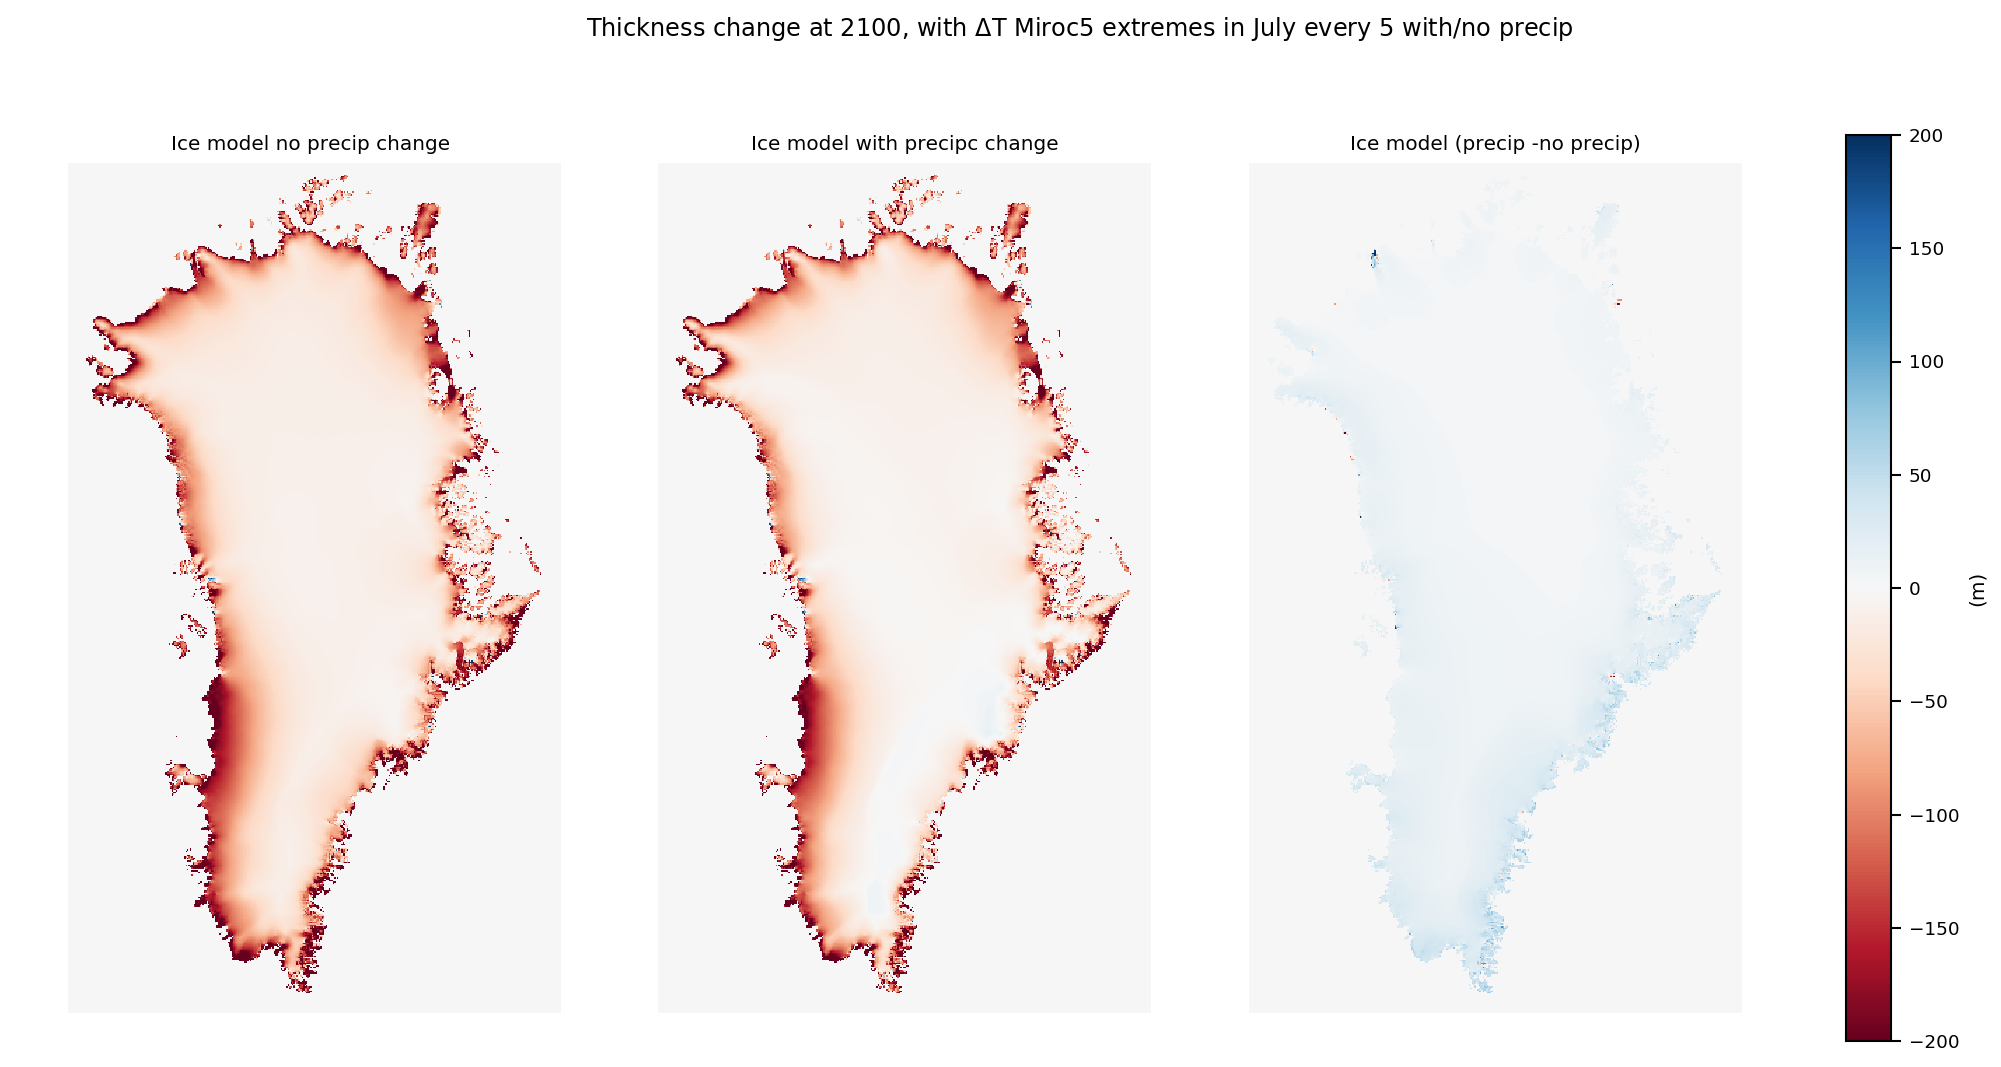

In [56]:
### extremes

file_prech = files_dyn0_prech[6]
file= files_dyn0[6]
# file_no_mass= files0[3]
# file_no_mass_prech= files0_prech[3]

thk0 = da.read_nc(output_proj + 'proj_step6K_330a_no_mass/'+'gris_4500.nc','thk')

thk1 = da.read_nc(output_proj+file+'y130gris_4500.nc','thk')
thk1_prech = da.read_nc(output_proj+file_prech+'y130gris_4500.nc','thk')
# nn = np.load(output_proj + file_no_mass + 'calc_thickness_grounded_from_total_thickness.npz')
# dthk1=nn['thk_last']
# dthk0= nn['thk_0']
# dthk1_extr = dthk1
# thk1_extr = thk1



vvel = 200
f,ax =plt.subplots(1,3,figsize =(18,8),dpi=150)
f.suptitle('Thickness change at 2100, with $ \mathrm{\Delta T} $ Miroc5 extremes in July every 5 with/no precip')

ax[0].set_title('Ice model no precip change ')
ax[1].set_title('Ice model with precipc change' )
ax[2].set_title('Ice model (precip -no precip)')
css=ax[0].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# # plt.axis('off')

ax[0].set_axis_off()
css=ax[1].imshow( thk1_prech.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)

# cs1=ax[1].imshow( dthk1-dthk0 ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# plt.axis('off')
ax[1].set_axis_off()

cs2=ax[2].imshow( thk1_prech.values[0,]- thk1.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
ax[2].set_axis_off()
# f.colorbar(css, ax = ax[0])
# f.colorbar(cs1, ax = ax[1])
f.colorbar(cs2,ax=ax.ravel().tolist(), label ='(m)')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lpr.pdf')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lp.png', transparent=True)
# plt.axis('off')

## Velocitiy change 

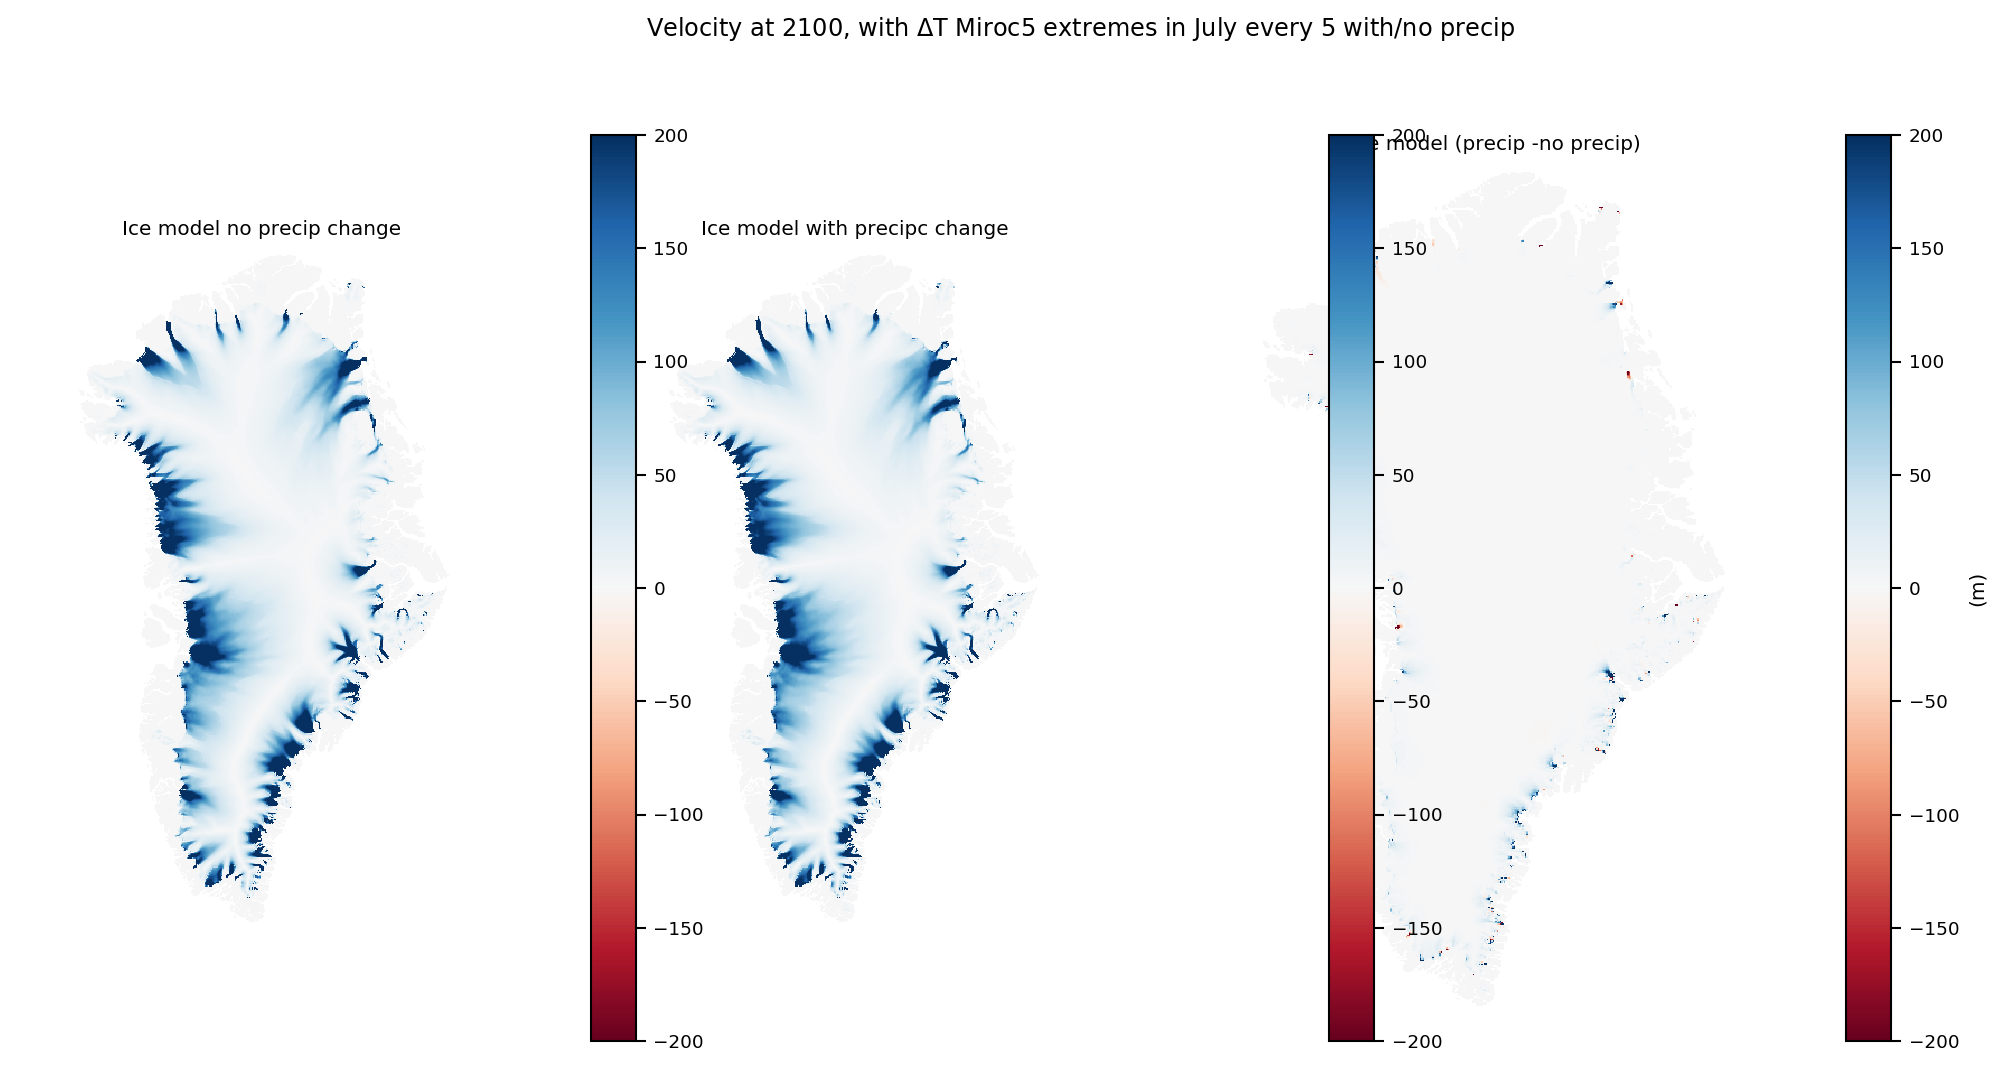

In [65]:
### extremes

file_prech = files_dyn0_prech[6]
file= files_dyn0[6]
# file_no_mass= files0[3]
# file_no_mass_prech= files0_prech[3]

thk0 = da.read_nc( ctrl+'gris_4500m.nc','velsurf_mag')

thk1 = da.read_nc(output_proj+file+'y130gris_4500.nc','velsurf_mag')
thk1_prech = da.read_nc(output_proj+file_prech+'y130gris_4500.nc','velsurf_mag')
# nn = np.load(output_proj + file_no_mass + 'calc_thickness_grounded_from_total_thickness.npz')
# dthk1=nn['thk_last']
# dthk0= nn['thk_0']
# dthk1_extr = dthk1
# thk1_extr = thk1



vvel = 200
f,ax =plt.subplots(1,3,figsize =(18,8),dpi=150)
f.suptitle('Velocity at 2100, with $ \mathrm{\Delta T} $ Miroc5 extremes in July every 5 with/no precip')

ax[0].set_title('Ice model no precip change ')
ax[1].set_title('Ice model with precipc change' )
ax[2].set_title('Ice model (precip -no precip)')
css=ax[0].imshow( thk1.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# # plt.axis('off')

ax[0].set_axis_off()
cs1=ax[1].imshow( thk1_prech.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)

# cs1=ax[1].imshow( dthk1-dthk0 ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# plt.axis('off')
ax[1].set_axis_off()

cs2=ax[2].imshow( thk1_prech.values[0,]- thk1.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
ax[2].set_axis_off()
f.colorbar(css, ax = ax[0])
f.colorbar(cs1, ax = ax[1])
f.colorbar(cs2,ax=ax.ravel().tolist(), label ='(m)')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lpr.pdf')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lp.png', transparent=True)
# plt.axis('off')

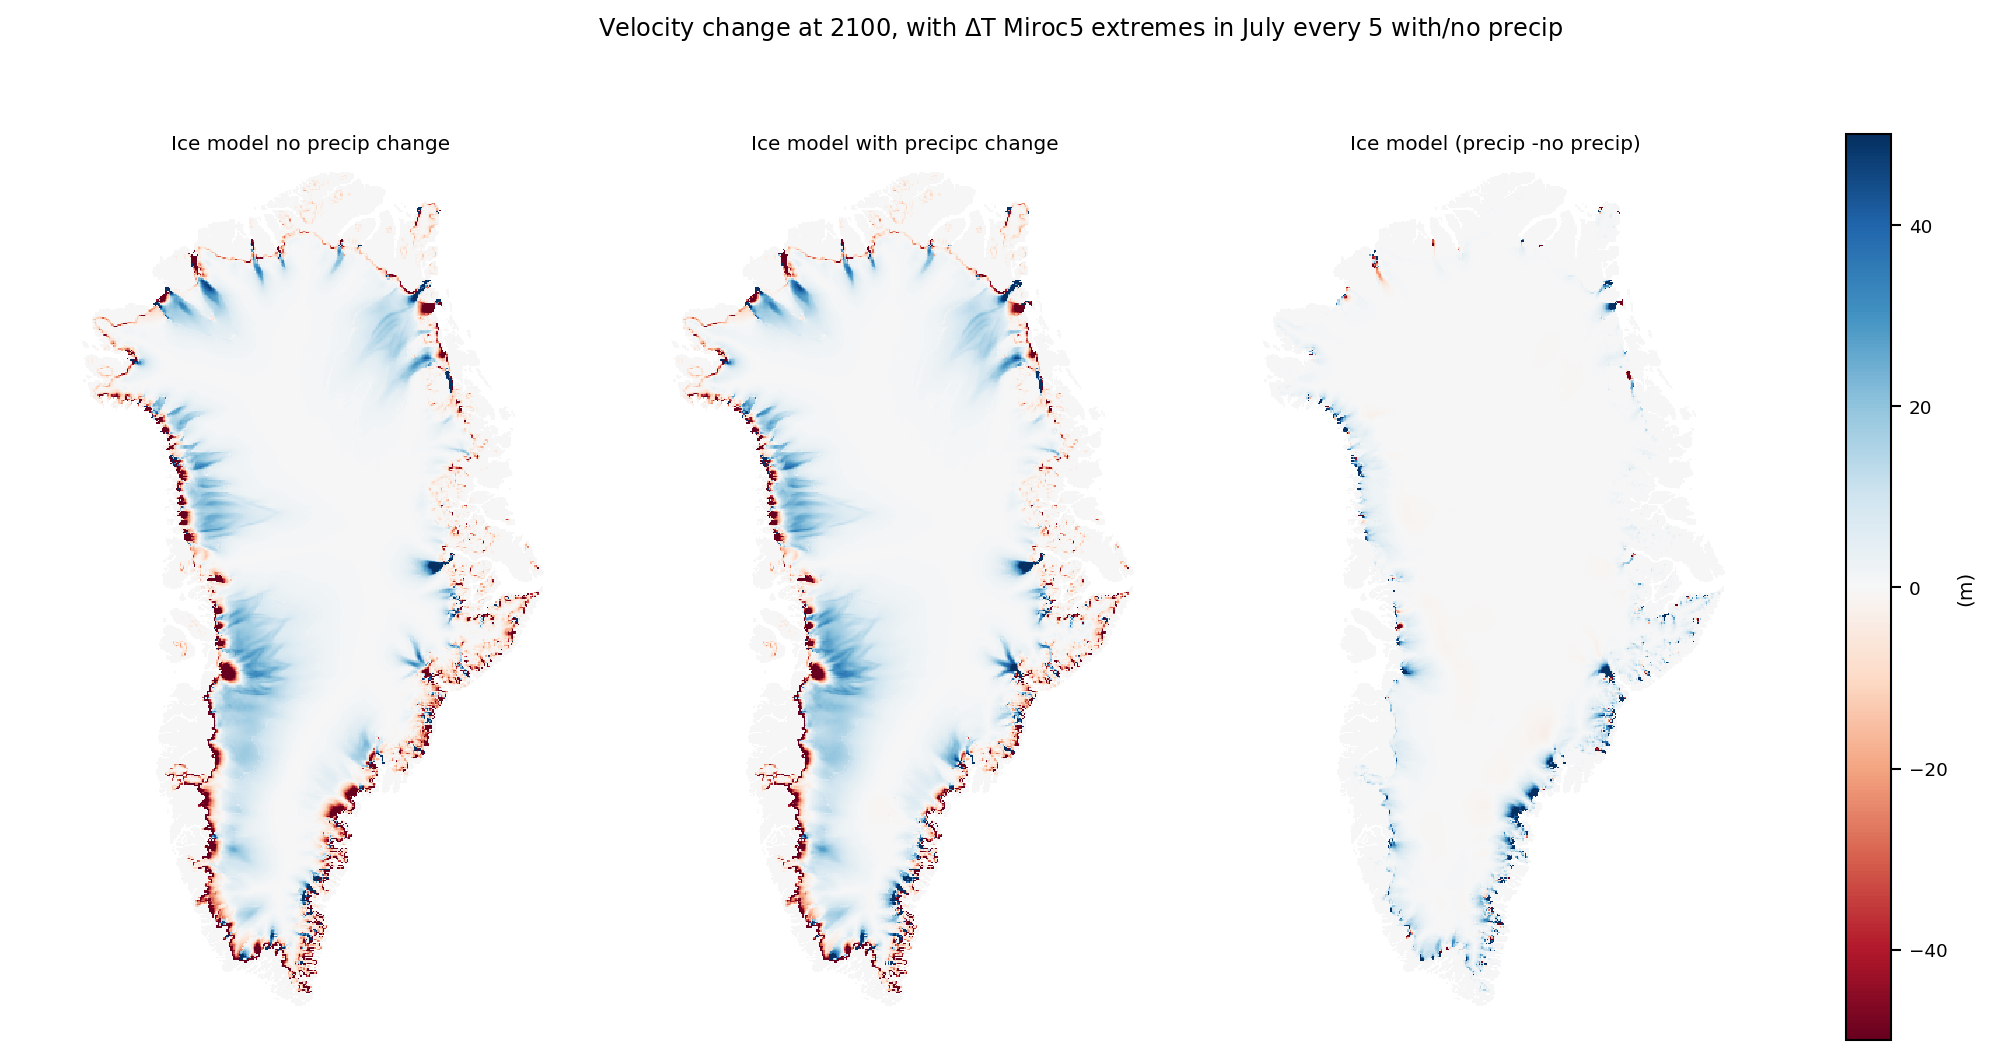

In [69]:
### extremes

file_prech = files_dyn0_prech[6]
file= files_dyn0[6]
# file_no_mass= files0[3]
# file_no_mass_prech= files0_prech[3]

thk0 = da.read_nc( ctrl+'gris_4500m.nc','velsurf_mag')

thk1 = da.read_nc(output_proj+file+'y130gris_4500.nc','velsurf_mag')
thk1_prech = da.read_nc(output_proj+file_prech+'y130gris_4500.nc','velsurf_mag')
# nn = np.load(output_proj + file_no_mass + 'calc_thickness_grounded_from_total_thickness.npz')
# dthk1=nn['thk_last']
# dthk0= nn['thk_0']
# dthk1_extr = dthk1
# thk1_extr = thk1



vvel = 50
f,ax =plt.subplots(1,3,figsize =(18,8),dpi=150)
f.suptitle('Velocity change at 2100, with $ \mathrm{\Delta T} $ Miroc5 extremes in July every 5 with/no precip')

ax[0].set_title('Ice model no precip change ')
ax[1].set_title('Ice model with precipc change' )
ax[2].set_title('Ice model (precip -no precip)')
css=ax[0].imshow( thk1.values[0,] -thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# # plt.axis('off')

ax[0].set_axis_off()
cs1=ax[1].imshow( thk1_prech.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)

# cs1=ax[1].imshow( dthk1-dthk0 ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
# plt.axis('off')
ax[1].set_axis_off()

cs2=ax[2].imshow( thk1_prech.values[0,]- thk1.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
ax[2].set_axis_off()
# f.colorbar(css, ax = ax[0])
# f.colorbar(cs1, ax = ax[1])
f.colorbar(cs2,ax=ax.ravel().tolist(), label ='(m)')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lpr.pdf')
plt.savefig(path_plot + 'prech_2d_Mirco5_dyn_e5_vs_dyn_e5_lp.png', transparent=True)
# plt.axis('off')